In [2]:
#March 21, 2022

#UTI AI Project
#Using UA data to predict urine culture results, now it is being put into GitHub for version control.

import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

#First read in 9.22.21.csv that has all available data on a full UA with cytology
data = pd.read_csv('/Users/krystlereagan/Documents/Documents/Research_Projects/AI/Feline_UTI_AI/Data Analysis 3.22.22/Feline UTI Data.csv')
pd.options.display.max_columns = None
data

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,Pyuria,RBC,Crystals,Epithelial cells transitional,Epithelial cells squamous,Epithelial cells renal,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,0,2,0,2,0,0,0,0,0,0,0,0,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0,0,0,1,1,0,0,0,0,0,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,0,5,1,1,1,0,0,1,0,0,0,0,0
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,0,8,0,1,1,0,0,1,0,0,0,0,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,0,8,0,2,2,0,0,0,0,0,0,0,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,0,5,0,1,1,0,0,0,0,0,0,2,1


In [3]:
from pycaret.classification import * 

In [4]:
#Include all features and fix classification imbalance
exp1_clf = setup(data, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'Hemoprotein', 'ph', 'WBC', 'RBC'], ignore_features =['Visit Number '])

,Description,Value
0,session_id,7862
1,Target,Positive culture
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4052, 29)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9326,0.8995,0.7142,0.8901,0.7915,0.7520,0.7591,0.3840
lightgbm,Light Gradient Boosting Machine,0.9288,0.9023,0.7183,0.8639,0.7837,0.7415,0.7465,0.1220
ada,Ada Boost Classifier,0.9267,0.8916,0.6889,0.8791,0.7714,0.7285,0.7369,0.1280
ridge,Ridge Classifier,0.9252,0.0000,0.7299,0.8354,0.7786,0.7339,0.7367,0.0240
lr,Logistic Regression,0.9242,0.9025,0.7710,0.8018,0.7855,0.7395,0.7401,0.7090
rf,Random Forest Classifier,0.9242,0.8982,0.7124,0.8438,0.7718,0.7268,0.7310,0.1620
lda,Linear Discriminant Analysis,0.9238,0.8900,0.7280,0.8300,0.7750,0.7294,0.7321,0.0720
et,Extra Trees Classifier,0.9231,0.8734,0.7144,0.8365,0.7697,0.7240,0.7278,0.1640
dt,Decision Tree Classifier,0.8861,0.8330,0.7123,0.6802,0.6929,0.6234,0.6257,0.0480
knn,K Neighbors Classifier,0.7564,0.7454,0.6242,0.3916,0.4805,0.3326,0.3484,0.0600


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7862, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9331,0.8641,0.7451,0.8636,0.8000,0.7601,0.7631
1,0.9190,0.9028,0.6471,0.8684,0.7416,0.6948,0.7053
2,0.9472,0.9631,0.8039,0.8913,0.8454,0.8136,0.8152
3,0.9190,0.9043,0.6471,0.8684,0.7416,0.6948,0.7053
4,0.9472,0.9264,0.7647,0.9286,0.8387,0.8075,0.8129
5,0.9437,0.8829,0.7500,0.9286,0.8298,0.7965,0.8030
6,0.9435,0.8911,0.7255,0.9487,0.8222,0.7893,0.7994
7,0.9152,0.8999,0.6275,0.8649,0.7273,0.6786,0.6908
8,0.9364,0.9376,0.7647,0.8667,0.8125,0.7744,0.7766
9,0.9223,0.8230,0.6667,0.8718,0.7556,0.7103,0.7193


In [7]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9331,0.9075,0.7451,0.8636,0.8000,0.7601,0.7631
1,0.9261,0.8962,0.7059,0.8571,0.7742,0.7305,0.7354
2,0.9542,0.9674,0.8235,0.9130,0.8660,0.8385,0.8401
3,0.9261,0.9056,0.7255,0.8409,0.7789,0.7348,0.7377
4,0.9331,0.9342,0.7647,0.8478,0.8041,0.7639,0.7654
5,0.9472,0.8835,0.7692,0.9302,0.8421,0.8107,0.8160
6,0.9435,0.8782,0.7843,0.8889,0.8333,0.7995,0.8017
7,0.9258,0.9046,0.6863,0.8750,0.7692,0.7258,0.7334
8,0.9293,0.9418,0.8039,0.8039,0.8039,0.7608,0.7608
9,0.9152,0.8736,0.6667,0.8293,0.7391,0.6892,0.6951


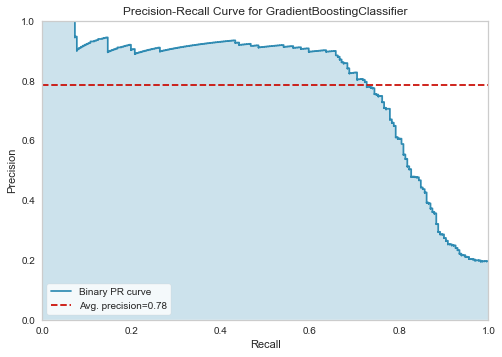

In [8]:
# Precision Recall Curve
plot_model(tuned_gbc, plot = 'pr')

In [22]:

scores_data1 = predict_model(tuned_gbc, raw_score = True, data = data)
scores_data1

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,...,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type,Label,Score_0,Score_1
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,...,0,0,0,0,0,0,0,0,0.8075,0.1925
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,...,0,0,0,0,0,0,0,0,0.7933,0.2067
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,...,0,0,0,0,0,0,0,0,0.8091,0.1909
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,...,0,0,0,0,0,0,0,0,0.7962,0.2038
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,...,0,0,0,0,0,0,0,0,0.8118,0.1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,...,0,1,0,0,0,0,0,0,0.7836,0.2164
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,...,0,1,0,0,0,0,0,0,0.7892,0.2108
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,...,0,0,0,0,0,0,0,0,0.8138,0.1862
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,...,0,0,0,0,0,2,1,1,0.2657,0.7343


In [24]:
scores_data1.to_csv('scores_data1.csv')

In [30]:
 #probability threshold 0.3
predict_model(tuned_gbc, probability_threshold = 0.759)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9038,0.8793,0.5411,0.9191,0.6812,0.6290,0.6596


,Age,BW,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,WBC,...,Sed Bac Quantity _2,Sed Bac Quantity _3,Sed Bac Type_0,Sed Bac Type_1,Sed Bac Type_2,Sed Bac Type_3,Sed Bac Type_4,Positive culture,Label,Score
0,7.8,6.0,1.023,8.0,25.0,0.0,0.0,6.0,250.0,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0.2534
1,1.1,4.3,1.044,6.0,25.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8087
2,1.6,4.9,1.043,7.0,150.0,0.0,0.0,0.0,250.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7919
3,11.2,3.6,1.022,6.0,150.0,0.0,0.0,0.0,150.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8103
4,2.0,7.3,1.006,8.0,150.0,0.0,0.0,0.0,250.0,20.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.3078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,20.1,2.3,1.027,7.0,150.0,0.0,0.0,0.0,25.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7861
1212,14.1,3.6,1.053,7.0,25.0,0.0,0.0,0.0,25.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8098
1213,9.4,4.9,1.023,6.0,25.0,0.0,0.0,0.0,50.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7929
1214,15.7,3.2,1.014,6.0,75.0,0.0,0.0,0.0,250.0,100.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.2529


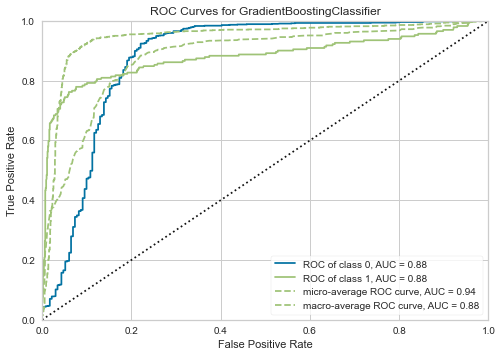

In [28]:
plot_model(tuned_gbc)

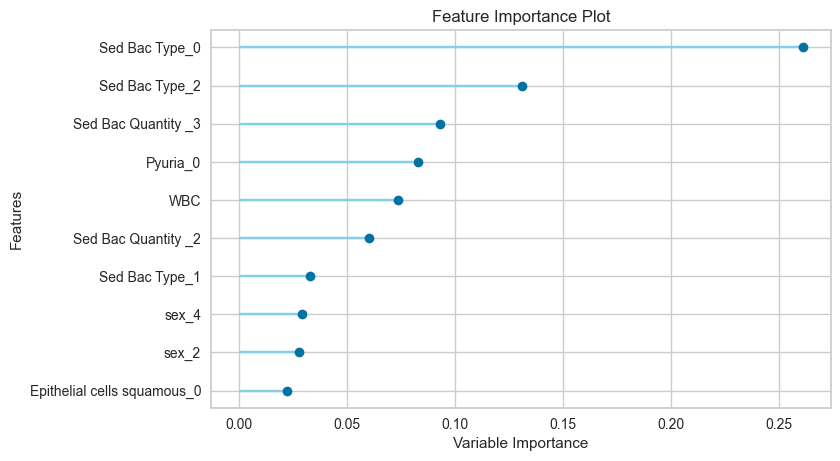

In [32]:
plot_model(tuned_gbc, plot='feature')

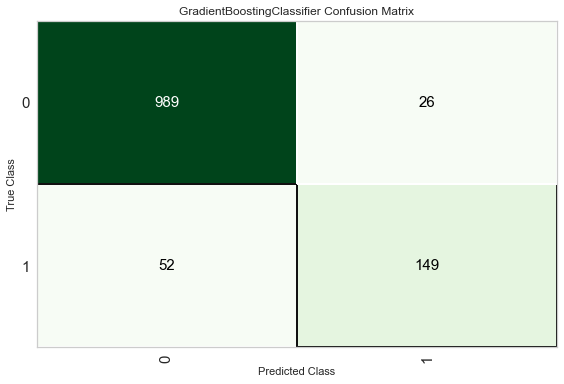

In [33]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [9]:
evaluate_model(tuned_gbc)

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.001
loss,deviance
max_depth,6
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.02
min_impurity_split,None


In [10]:
#Next will read in 9.22.21b.csv that only has usg and dipstick information
data2 = pd.read_csv('/Users/krystlereagan/Documents/Documents/Research_Projects/AI or Data Science Projects/Feline UTI AI/Data Analysis 9.22.21/Feline UTI 9.22.21b.csv')
pd.options.display.max_columns = None
data2

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,RBC
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,2
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,5
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,8
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,8
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,5


In [11]:
#Include all features and fix classification imbalance
exp1_clf = setup(data2, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'Hemoprotein', 'ph', 'WBC', 'RBC'], ignore_features =['Visit Number '])

,Description,Value
0,session_id,3379
1,Target,Positive culture
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4052, 17)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8773,0.7966,0.4951,0.7345,0.5905,0.5216,0.5362,0.2390
rf,Random Forest Classifier,0.8713,0.7742,0.4420,0.7366,0.5501,0.4806,0.5033,0.1310
lightgbm,Light Gradient Boosting Machine,0.8713,0.7819,0.4733,0.7152,0.5675,0.4958,0.5115,0.0600
ada,Ada Boost Classifier,0.8646,0.7975,0.5346,0.6524,0.5854,0.5056,0.5105,0.0800
et,Extra Trees Classifier,0.8628,0.7525,0.4143,0.7018,0.5184,0.4448,0.4672,0.1490
ridge,Ridge Classifier,0.8142,0.0000,0.5720,0.4888,0.5248,0.4108,0.4142,0.0140
lda,Linear Discriminant Analysis,0.8138,0.7642,0.5760,0.4883,0.5260,0.4118,0.4155,0.0370
lr,Logistic Regression,0.8082,0.7781,0.6076,0.4751,0.5318,0.4139,0.4197,0.3230
dt,Decision Tree Classifier,0.7874,0.6790,0.4814,0.4212,0.4471,0.3169,0.3192,0.0220
knn,K Neighbors Classifier,0.7408,0.7293,0.5938,0.3632,0.4502,0.2935,0.3090,0.0330


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3379, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
gbc2 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8908,0.7889,0.4902,0.8333,0.6173,0.5586,0.5853
1,0.8627,0.7639,0.4510,0.6765,0.5412,0.4642,0.4774
2,0.9049,0.8349,0.5490,0.8750,0.6747,0.6224,0.6456
3,0.8873,0.7624,0.5294,0.7714,0.6279,0.5642,0.5781
4,0.8697,0.8064,0.4706,0.7059,0.5647,0.4917,0.5057
5,0.8873,0.8559,0.5294,0.7714,0.6279,0.5642,0.5781
6,0.8834,0.8224,0.5800,0.7073,0.6374,0.5687,0.5727
7,0.8834,0.8061,0.5000,0.7576,0.6024,0.5374,0.5534
8,0.8551,0.7882,0.4400,0.6286,0.5176,0.4355,0.4451
9,0.8481,0.7368,0.4118,0.6176,0.4941,0.4089,0.4205


In [14]:
tuned_gbc2 = tune_model(gbc2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8908,0.7839,0.5098,0.8125,0.6265,0.5665,0.5876
1,0.8627,0.7847,0.4706,0.6667,0.5517,0.4735,0.4835
2,0.8944,0.8116,0.5686,0.7838,0.6591,0.5985,0.6092
3,0.8697,0.7580,0.5686,0.6591,0.6105,0.5328,0.5349
4,0.8662,0.7843,0.5490,0.6512,0.5957,0.5163,0.5190
5,0.8838,0.8622,0.6275,0.6957,0.6598,0.5900,0.5911
6,0.8763,0.8276,0.6000,0.6667,0.6316,0.5575,0.5586
7,0.8693,0.7802,0.5600,0.6512,0.6022,0.5245,0.5266
8,0.8587,0.8028,0.5400,0.6136,0.5745,0.4901,0.4916
9,0.8304,0.7793,0.4314,0.5366,0.4783,0.3784,0.3816


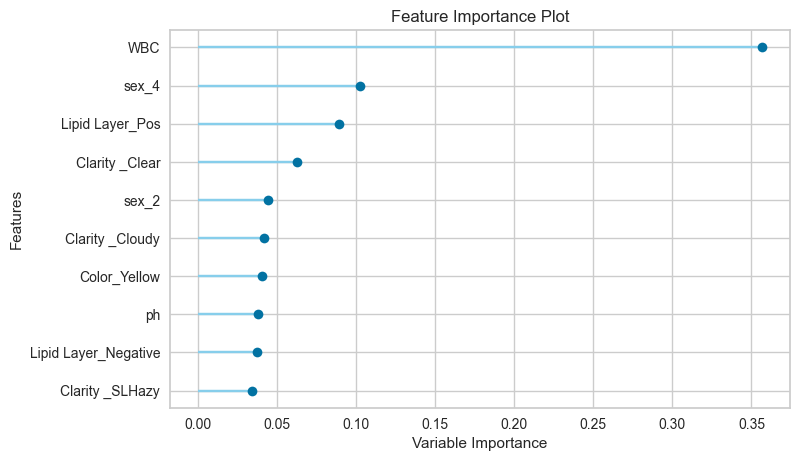

In [15]:
plot_model(tuned_gbc2, plot='feature')

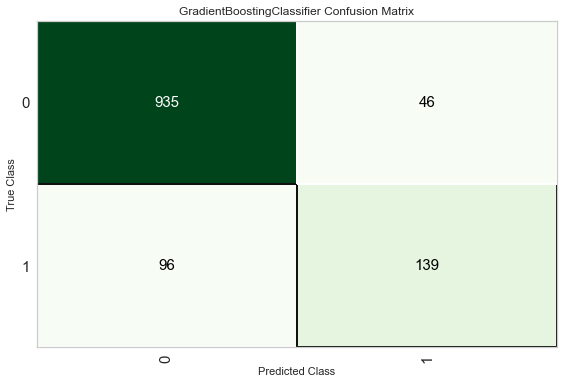

In [16]:
plot_model(tuned_gbc2 , plot = 'confusion_matrix')

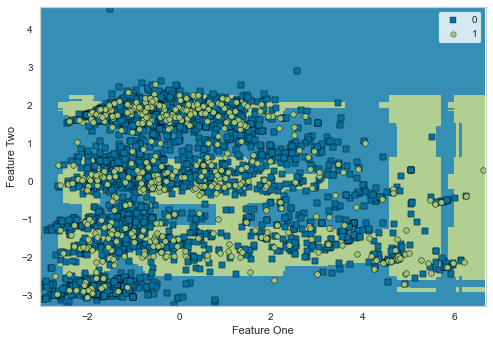

In [19]:
plot_model(tuned_gbc2 , plot = 'boundary', use_train_data = True)

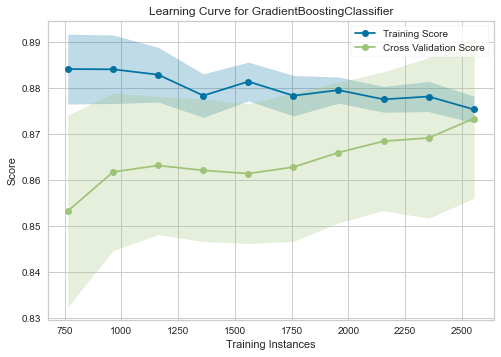

In [20]:
plot_model(tuned_gbc2, plot = 'learning', use_train_data = True)

In [34]:
#Next will read in 9.22.21c.csv that only has usg and dipstick information without rbc or wbcs
data3 = pd.read_csv('/Users/krystlereagan/Documents/Documents/Research_Projects/AI or Data Science Projects/Feline UTI AI/Data Analysis 9.22.21/Feline UTI 9.22.21c.csv')
pd.options.display.max_columns = None
data3

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0


In [35]:
#Include all features and fix classification imbalance
exp1_clf = setup(data3, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'Hemoprotein', 'ph'], ignore_features =['Visit Number '])

,Description,Value
0,session_id,5936
1,Target,Positive culture
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4052, 14)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8135,0.6928,0.2599,0.4838,0.3351,0.2377,0.2550,0.0550
rf,Random Forest Classifier,0.8099,0.7012,0.2558,0.4644,0.3254,0.2261,0.2418,0.1380
gbc,Gradient Boosting Classifier,0.8089,0.7159,0.2775,0.4568,0.3430,0.2394,0.2506,0.2020
ada,Ada Boost Classifier,0.8011,0.7010,0.2871,0.4246,0.3400,0.2290,0.2360,0.0840
et,Extra Trees Classifier,0.7980,0.6860,0.2540,0.4081,0.3116,0.2010,0.2094,0.1470
dt,Decision Tree Classifier,0.7278,0.5702,0.3088,0.2747,0.2887,0.1221,0.1232,0.0140
ridge,Ridge Classifier,0.6523,0.0000,0.6641,0.2957,0.4087,0.2117,0.2464,0.0120
lr,Logistic Regression,0.6509,0.7013,0.6681,0.2951,0.4090,0.2114,0.2470,0.5530
lda,Linear Discriminant Analysis,0.6502,0.6983,0.6641,0.2942,0.4073,0.2093,0.2442,0.0330
knn,K Neighbors Classifier,0.6294,0.6169,0.5351,0.2517,0.3421,0.1284,0.1465,0.0320


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
gbc3 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8063,0.7304,0.2353,0.4286,0.3038,0.2022,0.2145
1,0.8134,0.7271,0.3137,0.4706,0.3765,0.2719,0.2796
2,0.8345,0.7368,0.2941,0.5769,0.3896,0.3054,0.3286
3,0.8239,0.7221,0.2745,0.5185,0.3590,0.2680,0.2862
4,0.7782,0.7232,0.2885,0.3659,0.3226,0.1922,0.1941
5,0.7958,0.7166,0.1923,0.3846,0.2564,0.1530,0.1654
6,0.8057,0.6545,0.3529,0.4500,0.3956,0.2818,0.2848
7,0.8092,0.7137,0.2353,0.4444,0.3077,0.2090,0.2233
8,0.8198,0.6932,0.2941,0.5000,0.3704,0.2734,0.2865
9,0.8021,0.7415,0.2941,0.4286,0.3488,0.2369,0.2427


In [38]:
tuned_gbc3 = tune_model(gbc3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8239,0.7115,0.3529,0.5143,0.4186,0.3191,0.3269
1,0.8028,0.7021,0.2941,0.4286,0.3488,0.2374,0.2432
2,0.8451,0.7244,0.3137,0.6400,0.4211,0.3435,0.3727
3,0.8204,0.6765,0.2941,0.5000,0.3704,0.2738,0.2869
4,0.7606,0.7186,0.2692,0.3182,0.2917,0.1488,0.1496
5,0.7993,0.6951,0.2115,0.4074,0.2785,0.1753,0.1880
6,0.7915,0.6462,0.2745,0.3889,0.3218,0.2030,0.2073
7,0.7986,0.7107,0.2353,0.4000,0.2963,0.1879,0.1969
8,0.8233,0.7071,0.2745,0.5185,0.3590,0.2676,0.2858
9,0.7880,0.7203,0.3333,0.3953,0.3617,0.2357,0.2369


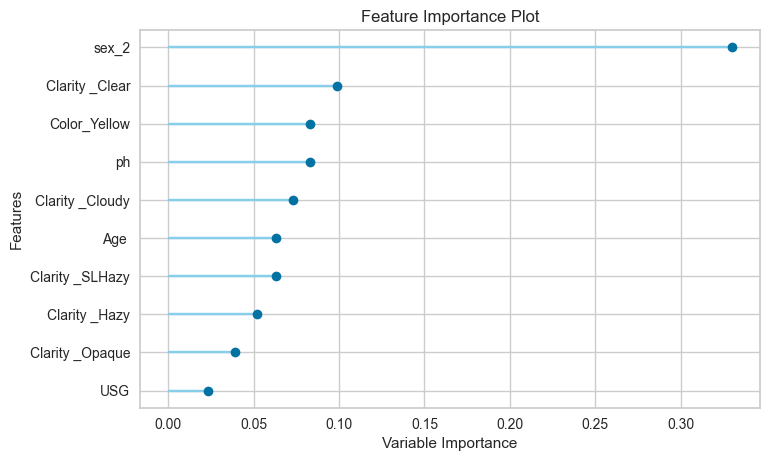

In [39]:
plot_model(gbc3, plot='feature')

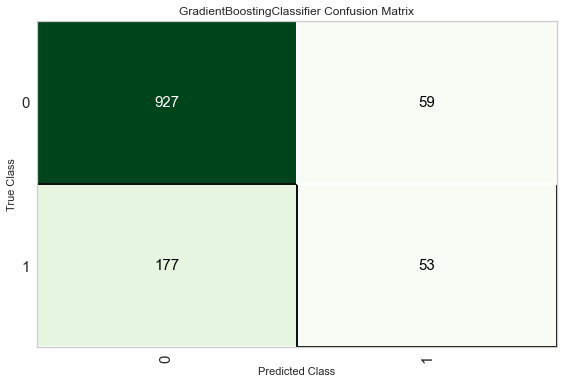

In [40]:
plot_model(gbc3 , plot = 'confusion_matrix')